In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

from collections import Counter

In [2]:
# read the data
df = pd.read_csv('all_stocks_5yr.csv')

# shape and data types of the data
print("Shape of our data is: ", df.shape)
print()

# type of each data
print("Data type is: ")

dType = pd.DataFrame(df.dtypes, columns = ['Type']) 

dType

Shape of our data is:  (619040, 7)

Data type is: 


,Type
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [3]:
# 1. Clean the data

In [4]:
# ** Missing data **

In [5]:
# Display Column with missing value 
print("Number of missing data per column: ")
df.isnull().sum()

Number of missing data per column: 


date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

<AxesSubplot:>

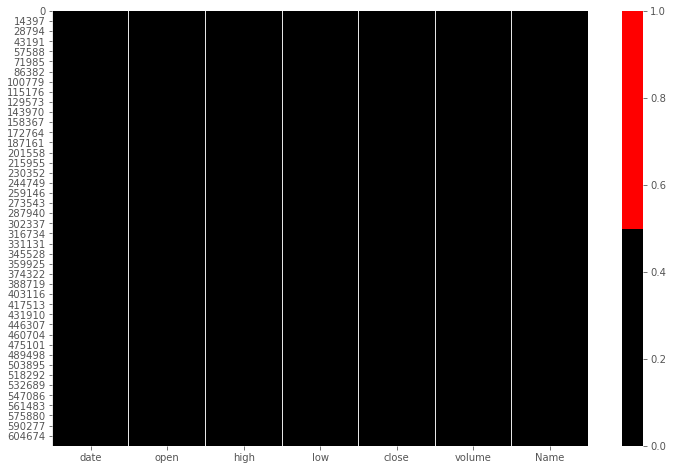

In [6]:
# Visualization: number of missing value is in red, black is not missing
sns.heatmap(df[df.columns[0:7]].isnull(), cmap=sns.color_palette(['#000000', '#FF0000']))

# Notice that open has 11 missing value and high and low all have the same 8 missing values. It's such a small 
# value that we can't see it in the visualization below

In [7]:
# To handle with missing data, we decide to impute the missing data with the average value from the data 
# of the same feature that's not missing. There are 619040 different rows and for those 3 sections there are 
# only less than 12 missing values. It's such a small number that the data won't be affect at all even if we 
# impute it
df['open'] = df['open'].fillna(df['open'].median())
df['high'] = df['high'].fillna(df['high'].median())
df['low'] = df['low'].fillna(df['low'].median())

In [8]:
# Display Column with missing value after handling missing values
print("Number of missing data per column after handling missing values: ")
df.isnull().sum()

Number of missing data per column after handling missing values: 


date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [9]:
# ** Outliers **

In [10]:
# Observing from our data, we can see that there are 5 columns we need to check for outliers. They are: 
# open, high, low, close, and volume

<AxesSubplot:>

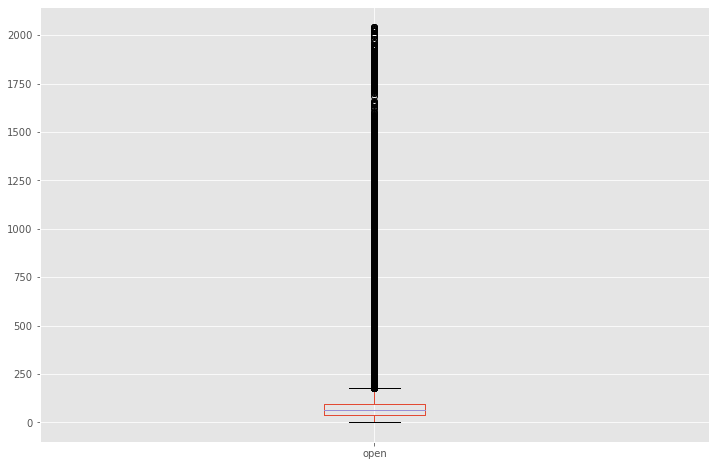

In [11]:
# We'll start with open. There seems to be no outliers
df.boxplot(column=['open'])

<AxesSubplot:>

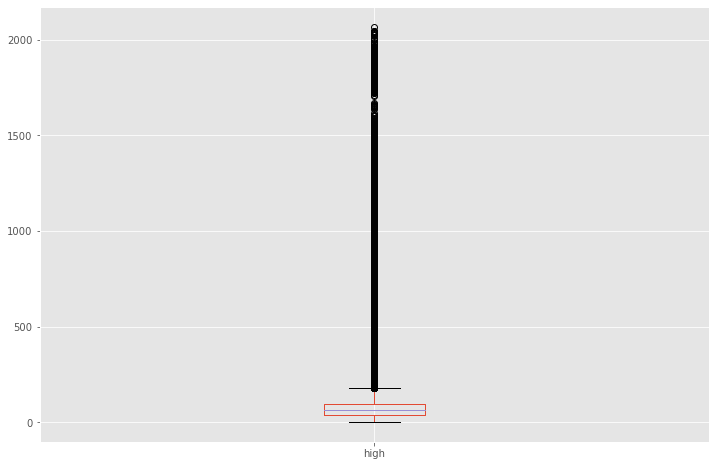

In [12]:
# Next is high. There seems to be no outliers
df.boxplot(column=['high'])

<AxesSubplot:>

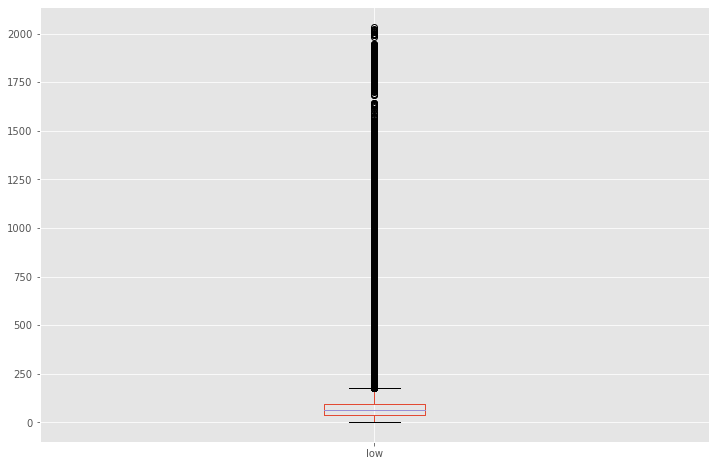

In [13]:
# Next is high. There seems to be no outliers
df.boxplot(column=['low'])

<AxesSubplot:>

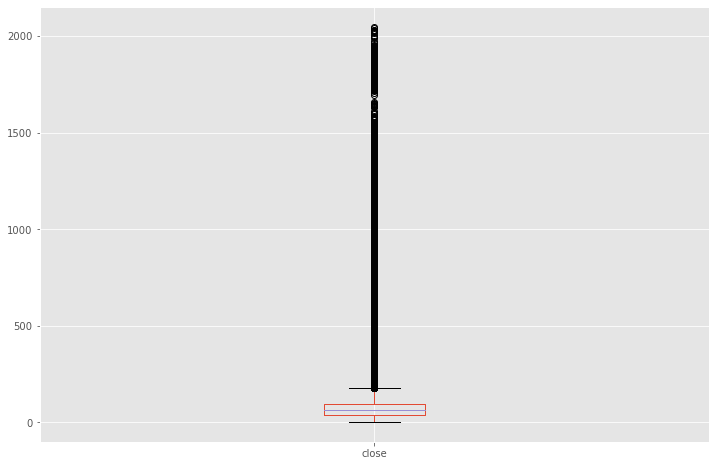

In [14]:
# Next is close. There seems to be no outliers
df.boxplot(column=['close'])

<AxesSubplot:>

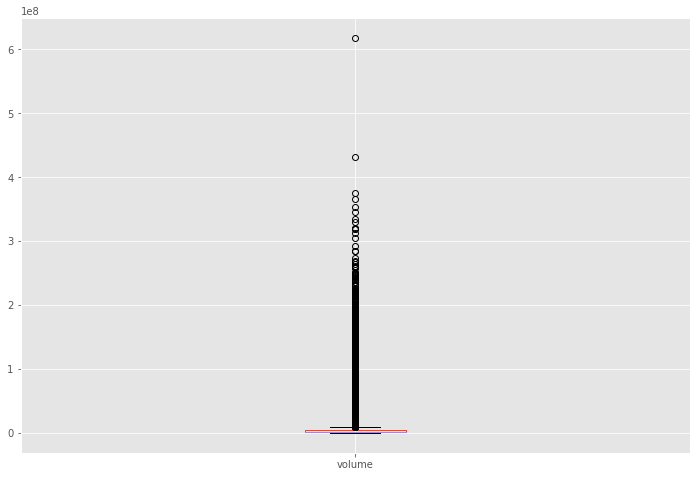

In [15]:
# Next is volumn.
df.boxplot(column=['volume'])

In [16]:
# Seems like we have an outlier. We can look at the descriptive statistic to check what that outlier is
df['volume'].describe()

count    6.190400e+05
mean     4.321823e+06
std      8.693610e+06
min      0.000000e+00
25%      1.070320e+06
50%      2.082094e+06
75%      4.284509e+06
max      6.182376e+08
Name: volume, dtype: float64

In [17]:
# As you can see, the maximum of 6.182376e+08 is our outlier because 75% quartile is only 4.284509e+06
# However, we decide to keep with outlier because it's an important piece to why the volume of the stock
# spike in a certain day, which can indicate good news and bad news about the individual stock

In [18]:
# ** Noisy data **
# First, we will check for repetitive data. I want to find columns that have more than 90% row value being the same
for col in df.columns:
    if (df[col].value_counts(dropna=False)/len(df.index)).iloc[0] > 0.9:
        print('{0}: {1:.5f}%'.format(col, (df[col].value_counts(dropna=False)/len(df.index)).iloc[0]*100), "of rows being the same")
        print()
        
# Nothing got printed, which means more than 90% of the data are different

In [19]:
# Second, we will check for irrelevant value. we have skimmed through all the features and see that 
# high and low don't really provide any valuable information for our project. They are, in our opinion, irrelevant. 
# For this project, we only interest in the open and close value of a stock to explain why it goes up or down at 
# the end of the day
df = df.drop(['high', 'low'], axis=1)

# Now we only have 5 columns
print("Shape of our data is: ", df.shape)
print()

Shape of our data is:  (619040, 5)



In [20]:
# Third, we will check for duplicated data by checking if there's any duplicate date and name together because 
# date and name together shoule be unique as it's describing a stock at a certain date
if df[df.duplicated(subset=['Name','date'])].empty:
    print("There's no duplicated row")
else:
    print("There're duplicated rows")
    
# Seems like we have no duplicated row

There's no duplicated row


In [21]:
# ** Inconsistent Data **

In [22]:
# First, inconsistent usage of upper and lower cases in categorical values is a common mistake. So, I'm going to
# put all letters to upper cases
df['Name'] = df['Name'].str.upper()

In [23]:
# Second, column date doesn't have the correct data format so I'm going to convert their type frome 
# object to datetime for easier analysis later

<AxesSubplot:>

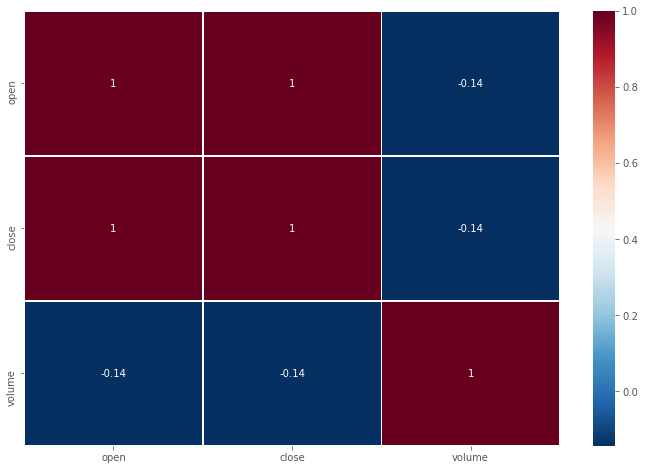

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# we check for correlation between the features using the Pearson Correlation Coefficient
corr = df.corr(method='pearson')

# print the correlation table
corr

# we print the heatmap of the correaltion table
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
cmap='RdBu_r', annot=True, linewidth=0.5)

# The dark maroon cells represent highly correlated features of our dataset